In [78]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ontarioproperties/properties.csv


In [79]:
df=pd.read_csv("/kaggle/input/ontarioproperties/properties.csv")

In [80]:
df.head(10)

,Unnamed: 0,Address,AreaName,Price ($),lat,lng
0,0,"86 Waterford Dr Toronto, ON",Richview,999888,43.679882,-79.544266
1,1,"#80 - 100 BEDDOE DR Hamilton, ON",Chedoke Park B,399900,43.250000,-79.904396
2,2,"213 Bowman Street Hamilton, ON",Ainslie Wood East,479000,43.251690,-79.919357
3,3,"102 NEIL Avenue Hamilton, ON",Greenford,285900,43.227161,-79.767403
4,6,"#1409 - 230 King St Toronto, ON",Downtown,362000,43.651478,-79.368118
5,7,"254A Monarch Park Ave Toronto, ON",Old East York,1488000,43.686375,-79.328918
6,8,"532 Caledonia Rd Toronto, ON",Fairbank,25,43.691193,-79.461662
7,9,"11 REBECCA Street Hamilton, ON",Central Hamilton,254900,43.258541,-79.867615
8,10,"617 BRIGADOON Drive Hamilton, ON",Gourley,364900,43.216557,-79.904991
9,12,"51 - 255 MOUNT ALBION Road Hamilton, ON",Red Hill,304900,43.215706,-79.794189


In [81]:
for c in df.columns:
    print(c)
df.rename(columns={'Price ($)': 'PriceCAD'}, inplace=True)

Unnamed: 0
Address
AreaName
Price ($)
lat
lng


In [82]:
pd.set_option('float_format', '{:f}'.format)
df.PriceCAD=df.PriceCAD.round(1).astype(int)
loc=df.groupby('AreaName', as_index=False)['PriceCAD'].mean().round(decimals=0).astype(object)
loc = loc[loc.PriceCAD != 0]


In [83]:
top20=loc.sort_values(by=['PriceCAD'], ascending=False).head(10)
bot20=loc.sort_values(by=['PriceCAD'], ascending=True).head(10)

In [84]:
loc.head()

,AreaName,PriceCAD
0,Aberfoyle,68000.000000
1,Acton,379300.000000
2,Agassiz,74000.000000
3,Agincourt,425287.000000
4,Agincourt North,2200000.000000


In [85]:
import matplotlib.pyplot as plt 
import seaborn as sns


In [86]:
top10.head()


,AreaName,PriceCAD
120,Bridle Path,15183286.000000
30,Appleby,9000000.000000
618,Lytton Park,4499900.000000
1114,York Mills,4436242.000000
967,Tempo,4198333.000000


In [87]:
bot10.head(10)

,AreaName,PriceCAD
86,Bishop Hellmuth Heritage District,1883.000000
1003,Trillium Industrial Park,3800.000000
628,Manitowaning,14999.000000
244,Clinton,19900.000000
181,Carnarvon,24500.000000
1049,West Guilford,26900.000000
1081,White River,29900.000000
736,Old Brooklyn,29900.000000
186,Casa Loma,35000.000000
163,Camden Township,39900.000000


[Text(0, 0.5, 'Price (CAD $)'), Text(0.5, 0, 'Area(Index)')]

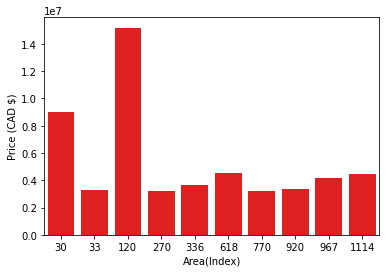

In [88]:
top20plot=sns.barplot(x = top20.index, y = 'PriceCAD', 
              data = top20, 
              color = 'red')
top20plot.set(xlabel='Area(Index)', ylabel='Price (CAD $)')

[Text(0, 0.5, 'Price (CAD $)'), Text(0.5, 0, 'Area(Index)')]

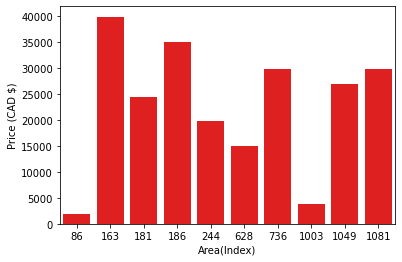

In [89]:
bot20plot=sns.barplot(x = bot20.index, y = 'PriceCAD', 
              data = bot20, 
              color = 'red')
bot20plot.set(xlabel='Area(Index)', ylabel='Price (CAD $)')

In [90]:
# Extract the data we're interested in
lat = df['lat'].values
lng = df['lng'].values
price = df['PriceCAD'].values


In [100]:
!conda install -c conda-forge basemap-data-hires


CondaHTTPError: HTTP 000 CONNECTION FAILED for url <https://conda.anaconda.org/conda-forge/linux-64/current_repodata.json>
Elapsed: -

An HTTP error occurred when trying to retrieve this URL.
HTTP errors are often intermittent, and a simple retry will get you on your way.
'https://conda.anaconda.org/conda-forge/linux-64'




In [97]:
conda install basemap


CondaHTTPError: HTTP 000 CONNECTION FAILED for url <https://conda.anaconda.org/conda-forge/linux-64/current_repodata.json>
Elapsed: -

An HTTP error occurred when trying to retrieve this URL.
HTTP errors are often intermittent, and a simple retry will get you on your way.
'https://conda.anaconda.org/conda-forge/linux-64'



Note: you may need to restart the kernel to use updated packages.


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  


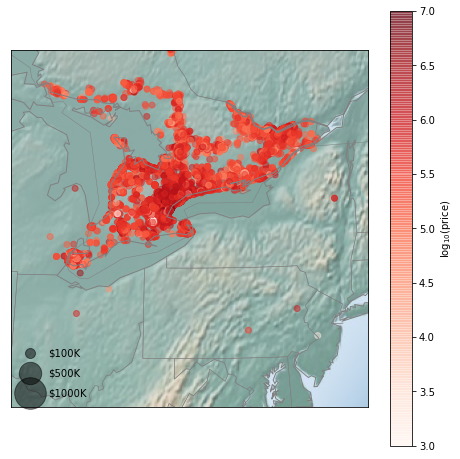

In [119]:
from mpl_toolkits.basemap import Basemap
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='l',
            width=1E6, height=1E6, 
            lat_0=43, lon_0=-79)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lng, lat, latlon=True,
          c=np.log10(price),
          cmap='Reds', alpha=0.5)

# 3. create colorbar and legend
plt.colorbar(label=r'$\log_{10}({\rm price})$')
plt.clim(3, 7)

# # make legend with dummy points
# for a in [100, 500, 1000]:
#     plt.scatter([], [], c='k', alpha=0.5, s=a,
#                 label='$' + str(a) + 'K')
# plt.legend(scatterpoints=1, frameon=False,
#            labelspacing=1, loc='lower left');